## logistic regression

it is borrowed from statistics
it is named after the core function used , logistic function

logistic function also called sigmoid function . it is an S shaper curved, that can take any real-valued number and map it into value between 0 and 1 
1/(1+e^-value)


it models the probability of the dedault class
the probability must be transformed into a binary values(0 or 1) in order to actually to make a probability prediction
logistic regression is a linear method but the predictions are done using logistic function

the coefficients of the logistic regression must be estimated from your training data. This is done using Maximum likelihood estimation  ->a common algorithm that make assumptions about the distribution about your data


The best coefficients would result in a model that would predict a value very close to 1 for the default class and close to 0 for other class.
The intuition is that a search procedure seeks values for the coefficients that minimizes the error in the probabilities predicted by the model to those in the data

just plug in numbers into the logistic regression and calculate the result


preparing data for logistic regression
binary output variables
remove noise
gaussian distribution
remove correlated inputs
fail to converge



we select a thresholf value or tipping point which we will classify values into 1 o 0

#### cost function
instead of MSE we use logloss 
it can be divided into 2 parts 
one for y =0 another for y =1
https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-cc75211ad9199ec33f790ca7d3ec43e1_l3.svg

## let's go through a example


In [1]:
# let's import everything

import pandas as pd



In [2]:
df = pd.read_csv("train.csv")  # to read file

In [3]:
df.shape  # to print the shape of the file

(891, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


we can see that some of the data are missing

there are 3 ports  C, Q abd S

In [7]:
ports = pd.get_dummies(df.Embarked,prefix='Embarked')
ports.head()  # Embarked has been transformed into 3 binray features

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [8]:
df =df.join(ports)
df.drop(['Embarked'],axis=1,inplace=True)  # axis = 1means columns and inplace =TRue means that the change should be reflected

now let's the gender feature too

In [9]:
df.Sex= df.Sex.map({'male':0,'female':1})

now to extract the target variable


In [10]:
y = df.Survived.copy()
df.drop(['Survived'],axis=1,inplace=True)

since cabin , ticket , name and ID are not so important features let's drop thesse

In [11]:
df.drop(['Cabin'],axis=1,inplace=True)
df.drop(['Ticket'],axis=1,inplace=True)
df.drop(['Name'],axis=1,inplace=True)
df.drop(['PassengerId'],axis=1,inplace=True)

let's fill Nan values with avg values

In [12]:
df.Age.fillna(df.Age.mean(),inplace=True)

In [13]:
#let'split the data into train and validation set
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid=train_test_split(df,y,test_size=0.2,random_state=7)  
# random state is necessary for reproducibility

In [14]:
#let's get our model then
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [15]:
model.fit(X_train,y_train)

C:\Users\shaag\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
#let's evaluate the model using inbuilt metrics
model.score(X_train,y_train)

0.8089887640449438

In [17]:
model.score(X_valid,y_valid)

0.7541899441340782

In [18]:
model.coef_

array([[-1.00595697e+00,  2.79873889e+00, -4.29634061e-02,
        -3.68667111e-01,  8.03811535e-04,  1.03600217e-03,
         8.34003685e-01,  3.87852403e-01,  2.40196019e-01]])

In [19]:
model.intercept_

array([1.72002333])

In [20]:
#let's calculate it on test set
df2= pd.read_csv("test.csv")


In [21]:

ports = pd.get_dummies(df2.Embarked,prefix='Embarked')

In [22]:
df2 =df2.join(ports)
df2.drop(['Embarked'],axis=1,inplace=True)


In [23]:
df2.Sex= df.Sex.map({'male':0,'female':1})

In [24]:
y = df2.Survived.copy()
df2.drop(['Survived'],axis=1,inplace=True)

AttributeError: 'DataFrame' object has no attribute 'Survived'

In [25]:
df2.drop(['Cabin'],axis=1,inplace=True)
df2.drop(['Ticket'],axis=1,inplace=True)
df2.drop(['Name'],axis=1,inplace=True)
df2.drop(['PassengerId'],axis=1,inplace=True)

In [26]:
df2.Age.fillna(df2.Age.mean(),inplace=True)

In [27]:
#let'split the data into train and validation set

X_train,X_test,y_train,y_test=train_test_split(df,y,test_size=0.99,random_state=7)  
# random state is necessary for reproducibility

In [28]:
model.score(X_test,y_test)

0.7995469988674971

so we only got about 79 % score which is good

## now let's try same using little bit EDA

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import numpy as np



In [63]:
train_df= pd.read_csv("train.csv")
test_df= pd.read_csv("test.csv")


In [64]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [66]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [67]:

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


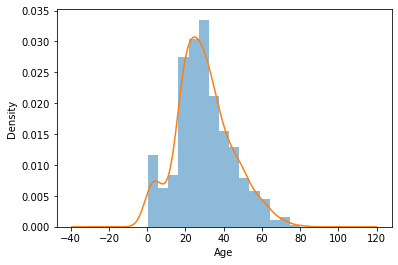

In [68]:
#since age value is missing  let's see what it looks like
ax = train_df['Age'].hist(bins=15,density=True,alpha=0.5)
train_df['Age'].plot(kind='density')
ax.set(xlabel='Age')
plt.show()

In [69]:
# so let's again fil missing value by mean of age
train_data= train_df.copy()
train_data['Age'].fillna(train_df["Age"].mean(),inplace=True)

In [70]:

ports = pd.get_dummies(train_df.Embarked,prefix='Embarked')
train_data =train_data.join(ports)
train_data.drop(['Embarked'],axis=1,inplace=True)


sex = pd.get_dummies(train_df.Embarked,prefix='Sex')
train_data =train_data.join(sex)
train_data.drop(['Sex'],axis=1,inplace=True)


In [71]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked_C   891 non-null    uint8  
 11  Embarked_Q   891 non-null    uint8  
 12  Embarked_S   891 non-null    uint8  
 13  Sex_C        891 non-null    uint8  
 14  Sex_Q        891 non-null    uint8  
 15  Sex_S        891 non-null    uint8  
dtypes: float64(2), int64(5), object(3), uint8(6)
memory usage: 75.0+ KB


In [72]:
train_data.drop(['Cabin'],axis=1,inplace=True)
train_data.drop(['Ticket'],axis=1,inplace=True)
train_data.drop(['Name'],axis=1,inplace=True)
train_data.drop(['PassengerId'],axis=1,inplace=True)

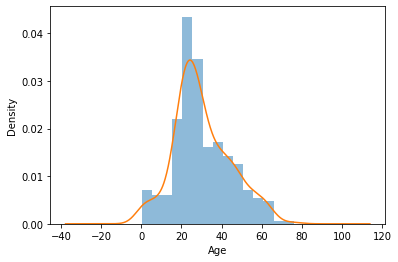

In [73]:
#same thing to test data
#since age value is missing  let's see what it looks like
ax = test_df['Age'].hist(bins=15,density=True,alpha=0.5)
test_df['Age'].plot(kind='density')
ax.set(xlabel='Age')
plt.show()

In [74]:
# so let's again fil missing value by mean of age
test_data= test_df.copy()
test_data['Age'].fillna(test_df["Age"].mean(),inplace=True)

In [75]:

ports = pd.get_dummies(test_df.Embarked,prefix='Embarked')
test_data =test_data.join(ports)
test_data.drop(['Embarked'],axis=1,inplace=True)

sex= pd.get_dummies(test_df.Embarked,prefix='Sex')
test_data =test_data.join(sex)
test_data.drop(['Sex'],axis=1,inplace=True)

In [76]:
test_data.drop(['Cabin'],axis=1,inplace=True)
test_data.drop(['Ticket'],axis=1,inplace=True)
test_data.drop(['Name'],axis=1,inplace=True)
test_data.drop(['PassengerId'],axis=1,inplace=True)

In [77]:
final_train=train_data
final_test=test_data

## EDA

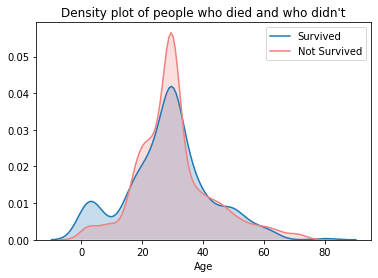

In [78]:
ax = sns.kdeplot(final_train["Age"][final_train.Survived==1],shade=True)
sns.kdeplot(final_train["Age"][final_train.Survived==0],color='lightcoral',
            shade=True)
plt.legend(['Survived','Not Survived'])
plt.title("Density plot of people who died and who didn't")
ax.set(xlabel='Age')
plt.show()

children survived more than adult betwn 0 and 20

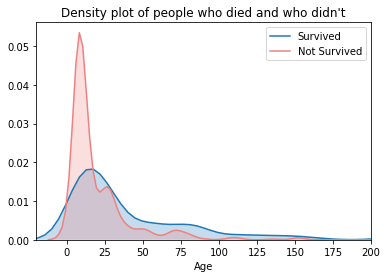

In [79]:
#now acording to fare
ax = sns.kdeplot(final_train["Fare"][final_train.Survived==1],shade=True)
sns.kdeplot(final_train["Fare"][final_train.Survived==0],color='lightcoral',
            shade=True)
plt.legend(['Survived','Not Survived'])
plt.title("Density plot of people who died and who didn't")
ax.set(xlabel='Age')
plt.xlim(-20,200)
plt.show()

people having less fare did not survived more compared to more fare

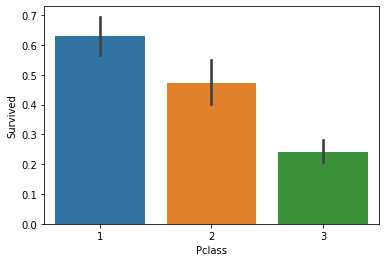

In [80]:
# now according to passenger class
sns.barplot('Pclass','Survived',data=train_df)
plt.show()

so first class  passengers were the saffest

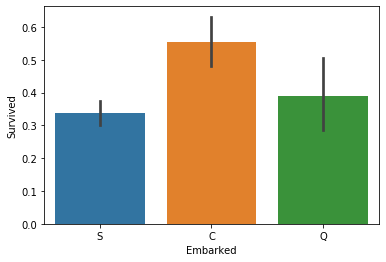

In [81]:
# now according to embarking
# now according to passenger class
sns.barplot('Embarked','Survived',data=train_df)
plt.show()


people who boared from C -> CherBourg have the highest survival rate 

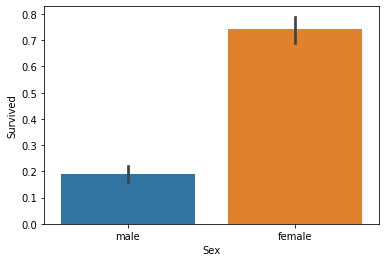

In [84]:
# now according to sex
sns.barplot('Sex','Survived',data=train_df)
plt.show()

 wow female really survived more than men
 

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [86]:
model=LogisticRegression()

In [87]:
rfe= RFE(model,8)

In [97]:
cols=['Age','Fare',"Embarked_C","Embarked_Q","Embarked_S","Sex_C","Sex_Q","Sex_S"]

In [98]:
final_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Embarked_C  891 non-null    uint8  
 7   Embarked_Q  891 non-null    uint8  
 8   Embarked_S  891 non-null    uint8  
 9   Sex_C       891 non-null    uint8  
 10  Sex_Q       891 non-null    uint8  
 11  Sex_S       891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(6)
memory usage: 47.1 KB


In [99]:
X=final_train[cols]
y = final_train['Survived']

In [100]:
rfe.fit(X,y)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=8, step=1, verbose=0)

    feature ranking with recursive feature elimination

In [103]:
from sklearn.feature_selection import RFECV
rfecv= RFECV(estimator = LogisticRegression(),step=1,cv=10,scoring='accuracy')
rfecv.fit(X,y)


RFECV(cv=10,
      estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=100,
                                   multi_class='auto', n_jobs=None,
                                   penalty='l2', random_state=None,
                                   solver='lbfgs', tol=0.0001, verbose=0,
                                   warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [105]:
print("optimal nummber of features is ",rfecv.n_features_)
print("selected features ",list(X.columns[rfecv.support_]))

optimal nummber of features is  8
selected features  ['Age', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_C', 'Sex_Q', 'Sex_S']


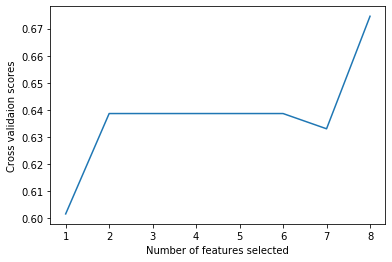

In [107]:
plt.plot(range(1,len(rfecv.grid_scores_)+1),rfecv.grid_scores_)
plt.xlabel("Number of features selected")
plt.ylabel("Cross validaion scores")
plt.show()

In [108]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score


In [109]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=7)

In [110]:
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred= model.predict(X_test)


In [111]:
print("accuracy is ",accuracy_score(y_test,y_pred))

accuracy is  0.7039106145251397


In [112]:
scores_accuracy = cross_val_score(model, X, y, cv=10, scoring='accuracy')
print("avg accuracy is ",scores_accuracy.mean())

avg accuracy is  0.6745817727840199
